In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import seaborn as sns
import skimage.io
import copy
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


In [2]:
from watermark import watermark
print(watermark())
print(watermark(packages="skimage,matplotlib,pandas,numpy,scipy,seaborn"))

Last updated: 2024-10-01T19:41:36.091744-07:00

Python implementation: CPython
Python version       : 3.10.14
IPython version      : 8.25.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 63 Stepping 2, GenuineIntel
CPU cores   : 72
Architecture: 64bit

skimage   : 0.23.2
matplotlib: 3.8.4
pandas    : 2.2.2
numpy     : 1.26.4
scipy     : 1.13.1
seaborn   : 0.13.2



In [3]:
cell_heights = pd.read_csv("cell_heights.csv") 

In [4]:
cell_heights['ext_diff'] = cell_heights['live_height_ext_pnts'] - cell_heights['lamin_height_ext_pnts']

In [5]:
cell_heights_microns = copy.deepcopy(cell_heights)
cell_heights_microns.set_index("cell", inplace=True)
cell_heights_microns = cell_heights_microns /4
cell_heights_microns.reset_index(inplace=True)

In [6]:
len(cell_heights)

43

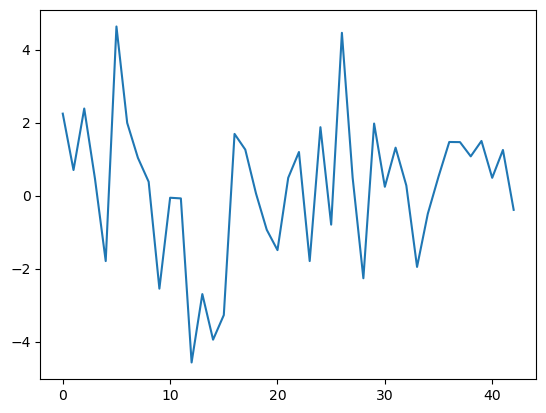

In [7]:
plt.plot(range(len(cell_heights['ext_diff'])), cell_heights['ext_diff'])

## Check Normality of differences

(array([ 2.,  1.,  4.,  4.,  5., 10., 10.,  5.,  0.,  2.]),
 array([-4.57055145, -3.65020657, -2.7298617 , -1.80951682, -0.88917195,
         0.03117292,  0.9515178 ,  1.87186267,  2.79220754,  3.71255242,
         4.63289729]),
 <BarContainer object of 10 artists>)

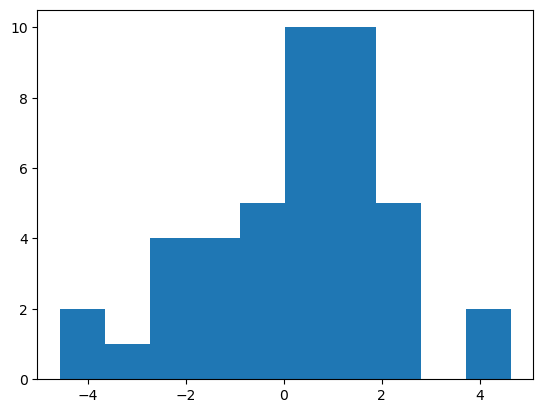

In [8]:
plt.hist(cell_heights['ext_diff'])

In [9]:
scipy.stats.normaltest(cell_heights['ext_diff'])

NormaltestResult(statistic=1.3638642094423075, pvalue=0.5056391002819873)

## Calculate Mean, standard error, and t-score

In [10]:
SE = scipy.stats.sem(cell_heights['ext_diff'])
SE

0.2998607963902054

In [11]:
mean_diff = np.mean(cell_heights['ext_diff'])
mean_diff

0.1822773268919764

In [12]:
t_0 = mean_diff/SE
t_0

0.6078731500958898

## Get paired t-test p-value

In [13]:
scipy.stats.ttest_1samp(cell_heights['ext_diff'],0)

TtestResult(statistic=0.6078731500958898, pvalue=0.546544725739178, df=42)

## Summary

To determine whether nuclei are flattening during the seqFISH protocol, we imaged nuclei expressing nuclear pore GFP while live, performed a mock seqFISH protocol, then imaged lamin staining. We used a modified functions a published single molecule microscopy fitting package to find locations producing fluorescence in both kinds of images ([Boyd, 2017](https://doi.org/10.1137/15M1035793)). Due to the differences in the images, For the fixed images of lamin stain, we found points on the nuclear periphery 

A two-sided paired t-test finds that the average difference in heights the nuclei while alive and after fixation is not signifantly different from zero (p=0.55).

Violin plots of live vs fixed heights, difference

snap shots of z series to show lamin

z slice projection



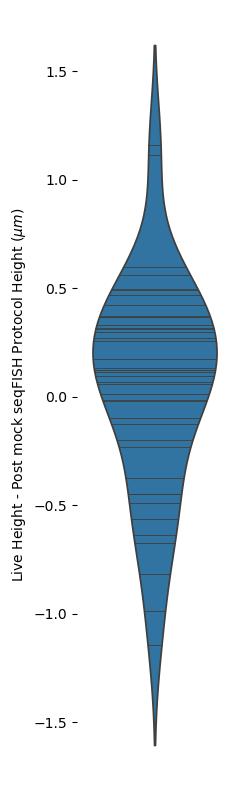

In [14]:
fig, ax = plt.subplots(1,1, figsize=(2,10))
sns.violinplot(cell_heights_microns['ext_diff'], inner='stick',ax=ax)
ax.set_ylabel("Live Height - Post mock seqFISH Protocol Height ($\mu m$)")

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.tick_params(bottom = False)


Make figure panels illustrating how the height was measured for each cell

In [15]:
cell_heights_microns.sort_values("ext_diff").reset_index(drop=True)

,cell,Unnamed: 0,live_min,live_max,lamin_min,lamin_max,live_height_10_90_CH,live_height_ext_pnts,lamin_height_10_90_CH,lamin_height_ext_pnts,ext_diff
0,fov2_rep1_live2_its1_70,0.0,1.026295,4.883657,0.750,5.750,3.076240,3.857362,4.375,5.000,-1.142638
1,fov2_rep1_live4_its1_55,0.0,1.159455,4.672985,0.750,5.250,3.077132,3.513529,3.500,4.500,-0.986471
2,fov2_rep1_live6_its1_40,0.0,1.090137,4.897154,0.875,5.500,3.102370,3.807018,3.625,4.625,-0.817982
3,fov2_rep1_live3_its1_72,0.0,0.798610,4.499423,0.750,5.125,3.091038,3.700813,3.500,4.375,-0.674187
4,fov1_rep1_live6_its1_63,0.0,1.146986,5.009868,1.000,5.500,2.970897,3.862883,3.375,4.500,-0.637117
5,fov7_rep2_live1_its1_21,0.0,1.039469,4.973513,2.125,6.625,3.094097,3.934044,4.125,4.500,-0.565956
6,fov8_rep2_live3_its1_42,0.0,1.500000,5.136849,2.625,6.750,3.186587,3.636849,3.500,4.125,-0.488151
7,fov10_rep2_live3_its1_68,0.0,1.938985,5.240700,2.250,6.000,2.532832,3.301715,2.750,3.750,-0.448285
8,fov3_rep2_live4_its1_56,0.0,0.753618,3.930401,1.625,5.250,2.661016,3.176783,3.000,3.625,-0.448217
9,fov2_rep2_live6_its1_23,0.0,1.374041,5.000800,3.000,7.000,2.981440,3.626759,3.500,4.000,-0.373241


In [16]:
np.median(cell_heights_microns['ext_diff'])

0.12190754884066113

In [17]:
def plot_cell_b4_after(cell_name, ax_live, ax_its1, lw=2):
    
    fixed_lamin_stack_path = "cropped_fix_its1_padded/fixits1_" + cell_name + ".tif"
    live_nuc_pore_stack_path = "cropped_live_nuc_pore_padded/live_" + cell_name +".tif"
    
    fixed_lamin_stack = skimage.io.imread(fixed_lamin_stack_path)
    live_stack = skimage.io.imread(live_nuc_pore_stack_path)

    # clip hot pixels
    live_stack[live_stack > 1000] = 1000
    fixed_lamin_stack[fixed_lamin_stack > 4000] = 4000

    live_bottom = int(np.floor(cell_heights.loc[cell_heights.cell == cell_name].live_min).iloc[0])
    live_top = int(np.round(cell_heights.loc[cell_heights.cell == cell_name].live_max).iloc[0])

    its1_bottom = int(np.floor(cell_heights.loc[cell_heights.cell == cell_name].lamin_min).iloc[0])
    its1_top = int(np.round(cell_heights.loc[cell_heights.cell == cell_name].lamin_max).iloc[0])

    bottom_padding = np.min([live_bottom, its1_bottom, 4])
    live_crop_bottom = live_bottom - bottom_padding
    its1_crop_bottom = its1_bottom - bottom_padding

    top_padding = np.min([np.shape(live_stack)[0] - live_top, np.shape(fixed_lamin_stack)[0] - its1_top, 4])
    its1_crop_top = its1_top + top_padding
    live_crop_top = live_top + top_padding

    ax_its1.imshow(np.sum(fixed_lamin_stack,axis=2)[its1_crop_bottom:its1_crop_top,:], aspect='auto', interpolation='none', origin='lower')
    ax_live.imshow(np.sum(live_stack,axis=2)[live_crop_bottom:live_crop_top,:], aspect='auto', interpolation='none', origin='lower')

    ax_its1.set_title("Post mock seqFISH protocol fixed lamin stain")
    ax_live.set_title("Live nuclear-pore GFP")
    
    lbls = []
    for z in range(live_crop_top - live_crop_bottom):
        if z % 4 == 0:
            lbls.append(str(int(z/4)))
        else:
            lbls.append('')
    
     
    ax_its1.set_yticks(range(live_crop_top - live_crop_bottom), labels=lbls)
    ax_live.set_yticks(range(live_crop_top - live_crop_bottom), labels= lbls)
    ax_live.yaxis.set_major_locator(MultipleLocator(4))
    ax_live.yaxis.set_minor_locator(MultipleLocator(1))
    ax_its1.yaxis.set_major_locator(MultipleLocator(4))
    ax_its1.yaxis.set_minor_locator(MultipleLocator(1))
    
    
    majx = []
    lbls = []
    minx = []
    for x in range(1,np.shape(fixed_lamin_stack)[1]):
        rem5 = (x * 0.103) % 5
        rem1 = (x * 0.103) % 1
        if (rem5 < 0.103/2) or rem5 > (5- 0.103/2):
            majx.append(x)
            lbls.append(int(np.round(x*0.103)))
        elif (rem1 < 0.103/2) or rem1 > (1- 0.103/2):
            minx.append(x)

    ax_live.set_xticks(majx, labels=lbls)
    ax_its1.set_xticks(majx, labels=lbls)
    ax_live.set_xticks(minx, minor=True)
    ax_its1.set_xticks(minx, minor=True)
    
    ax_its1.set_ylabel("z ($\mu m$)")
    ax_live.set_ylabel("z ($\mu m$)")
    
    ax_live.set_xlabel("x ($\mu m$)")
    ax_its1.set_xlabel("x ($\mu m$)")
    
    ax_live.plot([0, np.shape(live_stack)[1]-1], [cell_heights.loc[cell_heights.cell == cell_name, "live_min"]-live_crop_bottom]*2, 'r', linewidth =lw)
    ax_live.plot([0, np.shape(live_stack)[1]-1], [cell_heights.loc[cell_heights.cell == cell_name, "live_max"]-live_crop_bottom]*2, 'r', linewidth =lw)
    
    ax_its1.plot([0, np.shape(fixed_lamin_stack)[1]-1], [cell_heights.loc[cell_heights.cell == cell_name, "lamin_min"] - its1_crop_bottom]*2, 'r', linewidth =lw)
    ax_its1.plot([0, np.shape(fixed_lamin_stack)[1]-1], [cell_heights.loc[cell_heights.cell == cell_name, "lamin_max"] - its1_crop_bottom]*2, 'r', linewidth =lw)



In [18]:
representative_cell = 'fov9_rep2_live4_its1_38'

In [19]:
representative_cell = cell_heights_microns['cell'][3]
representative_cell

'fov10_rep2_live2_its1_59'

In [20]:
if 'each_cell_figs' not in os.listdir():
    os.mkdir('each_cell_figs')

In [21]:
for representative_cell in cell_heights_microns['cell']:
    fig, ax = plt.subplots(4, 5, figsize=(20,16), sharex=True, sharey=True)
    
    fixed_lamin_stack_path = "cropped_fix_its1_padded/fixits1_" + representative_cell+".tif"
    live_nuc_pore_stack_path = "cropped_live_nuc_pore_padded/live_" + representative_cell+".tif"
    
    fixed_lamin_stack = skimage.io.imread(fixed_lamin_stack_path)
    live_stack = skimage.io.imread(live_nuc_pore_stack_path)
    
    #clip live stack
    live_stack[live_stack > 1000] = 1000
    
    ms = 8
    ts = 20
    fpnts = pd.read_csv("filtered_live_pnts/live_" + representative_cell + ".csv")
    fpnts.z = np.round(fpnts.z)
    
    majx = []
    xlbls = []
    minx = []
    for x in range(1,np.shape(fixed_lamin_stack)[1]):
        rem5 = (x * 0.103) % 5
        rem1 = (x * 0.103) % 1
        if (rem5 < 0.103/2) or rem5 > (5- 0.103/2):
            majx.append(x)
            xlbls.append(int(np.round(x*0.103)))
        elif (rem1 < 0.103/2) or rem1 > (1- 0.103/2):
            minx.append(x)
    
    majy = []
    ylbls = []
    miny = []
    for y in range(1,np.shape(fixed_lamin_stack)[2]):
        rem5 = (y * 0.103) % 5
        rem1 = (y * 0.103) % 1
        if (rem5 < 0.103/2) or rem5 > (5- 0.103/2):
            majy.append(y)
            ylbls.append(int(np.round(y*0.103)))
        elif (rem1 < 0.103/2) or rem1 > (1- 0.103/2):
            miny.append(y)
    
    #stack is 0 indexed, points dataframe is 1 indexed
    bottom_slice = int(np.round(cell_heights.loc[cell_heights.cell == representative_cell, "live_min"]-1).iloc[0])
    
    vmax = np.max(live_stack[np.max([0,(bottom_slice-2)]):(bottom_slice+3),:,:])
    if bottom_slice >= 2:
        ax[1,0].imshow(live_stack[bottom_slice-2,:,:],vmax=vmax, origin='lower')
    if bottom_slice >= 1:
        ax[1,1].imshow(live_stack[bottom_slice-1,:,:],vmax=vmax, origin='lower')
    ax[1,2].imshow(live_stack[bottom_slice,:,:],vmax=vmax, origin='lower')
    ax[1,3].imshow(live_stack[bottom_slice+1,:,:],vmax=vmax, origin='lower')
    ax[1,4].imshow(live_stack[bottom_slice+2,:,:],vmax=vmax, origin='lower')
    
    ax[1,0].set_xticks(majx, labels=xlbls)
    ax[0,0].tick_params(labelsize=15)
    ax[1,0].tick_params(labelsize=15)
    ax[2,0].tick_params(labelsize=15)
    ax[3,0].tick_params(labelsize=15)
    ax[3,1].tick_params(labelsize=15)
    ax[3,2].tick_params(labelsize=15)
    ax[3,3].tick_params(labelsize=15)
    ax[3,4].tick_params(labelsize=15)
    
    
    ax[1,0].set_xticks(minx, minor=True)
    
    ax[1,0].set_yticks(majy, labels=ylbls)
    ax[1,0].set_yticks(miny, minor=True)
    
    ax[3,2].set_xlabel("x ($\mu m)$", size=20)
    fig.text(-0.01, 0.5, "y ($\mu m)$", va='center', rotation='vertical', size=20)
    #ax[2,0].set_ylabel(, 
    
    #ax[3,0].set_ylabel("Live nuclear-pore GFP", size=ts)
    
    bm2pnts = fpnts.loc[fpnts.z == bottom_slice-1]
    bm1pnts = fpnts.loc[fpnts.z == bottom_slice]
    bpnts = fpnts.loc[fpnts.z == bottom_slice+1]
    bp1pnts = fpnts.loc[fpnts.z == bottom_slice+2]
    bp2pnts = fpnts.loc[fpnts.z == bottom_slice+3]
    
    ax[1,0].plot(bm2pnts.x-1, bm2pnts.y-1, '.r', markersize=ms)
    ax[1,1].plot(bm1pnts.x-1, bm1pnts.y-1, '.r', markersize=ms)
    ax[1,2].plot(bpnts.x-1, bpnts.y-1, '.r', markersize=ms)
    ax[1,3].plot(bp1pnts.x-1, bp1pnts.y-1, '.r', markersize=ms)
    ax[1,4].plot(bp2pnts.x-1, bp2pnts.y-1, '.r', markersize=ms)
    #ax[2,0].set_title("Bottom - 2 z-slice", size=ts)  
    #ax[2,1].set_title("Bottom - 1 z-slice", size=ts)  
    #ax[2,2].set_title("Bottom z-slice", size=ts)  
    #ax[2,3].set_title("Bottom + 1 z-slice", size=ts)  
    #ax[2,4].set_title("Bottom + 2 z-slice", size=ts)  
    
    top_slice = int(np.round(cell_heights.loc[cell_heights.cell == representative_cell, "live_max"]-1).iloc[0])
    
    vmax = np.max(live_stack[(top_slice-2):(top_slice+3),:,:])
    ax[0,0].imshow(live_stack[top_slice-2,:,:],vmax=vmax, origin='lower')
    ax[0,1].imshow(live_stack[top_slice-1,:,:],vmax=vmax, origin='lower')
    ax[0,2].imshow(live_stack[top_slice,:,:],vmax=vmax, origin='lower')
    ax[0,3].imshow(live_stack[top_slice+1,:,:],vmax=vmax, origin='lower')
    ax[0,4].imshow(live_stack[top_slice+2,:,:],vmax=vmax, origin='lower')
    
    
    tm2pnts = fpnts.loc[fpnts.z == top_slice-1]
    tm1pnts = fpnts.loc[fpnts.z == top_slice]
    tpnts = fpnts.loc[fpnts.z == top_slice+1]
    tp1pnts = fpnts.loc[fpnts.z == top_slice+2]
    tp2pnts = fpnts.loc[fpnts.z == top_slice+3]
    #ax[0,0].set_ylabel("Live nuclear-pore GFP", size=ts)
    
    
    ax[0,0].plot(tm2pnts.x-1, tm2pnts.y-1, '.r', markersize=ms)
    ax[0,1].plot(tm1pnts.x-1, tm1pnts.y-1, '.r', markersize=ms)
    ax[0,2].plot(tpnts.x-1, tpnts.y-1, '.r', markersize=ms)
    ax[0,3].plot(tp1pnts.x-1, tp1pnts.y-1, '.r', markersize=ms)
    ax[0,4].plot(tp2pnts.x-1, tp2pnts.y-1, '.r', markersize=ms)
    
    ax[0,0].set_title("Boundary - 2 z-slice", size=ts)  
    ax[0,1].set_title("Boundary - 1 z-slice", size=ts)  
    ax[0,2].set_title("Boundary z-slice", size=ts)  
    ax[0,3].set_title("Boundary + 1 z-slice", size=ts)  
    ax[0,4].set_title("Boundary + 2 z-slice", size=ts)  
    
    fpnts = pd.read_csv("fit_fix_its1/its1_" + representative_cell + ".csv")
    fpnts.z = np.round(fpnts.z)
    
    #stack is 0 indexed, points dataframe is 1 indexed
    bottom_slice = int(np.floor(cell_heights.loc[cell_heights.cell == representative_cell, "lamin_min"]-1).iloc[0])
    
    vmax = np.max(fixed_lamin_stack[np.max([0,(bottom_slice-2)]):(bottom_slice+3),:,:])
    if bottom_slice >= 2:
        ax[3,0].imshow(fixed_lamin_stack[bottom_slice-2,:,:],vmax=vmax, origin='lower')
    if bottom_slice >= 1:
        ax[3,1].imshow(fixed_lamin_stack[bottom_slice-1,:,:],vmax=vmax, origin='lower')
    ax[3,2].imshow(fixed_lamin_stack[bottom_slice,:,:],vmax=vmax, origin='lower')
    ax[3,3].imshow(fixed_lamin_stack[bottom_slice+1,:,:],vmax=vmax, origin='lower')
    ax[3,4].imshow(fixed_lamin_stack[bottom_slice+2,:,:],vmax=vmax, origin='lower')
    
    
    bm2pnts = fpnts.loc[fpnts.z == bottom_slice-1]
    bm1pnts = fpnts.loc[fpnts.z == bottom_slice]
    bpnts = fpnts.loc[fpnts.z == bottom_slice+1]
    bp1pnts = fpnts.loc[fpnts.z == bottom_slice+2]
    bp2pnts = fpnts.loc[fpnts.z == bottom_slice+3]
    
    #ax[3,0].set_ylabel("Post mock protocol lamin stain", size=ts)
    
    ax[3,0].plot(bm2pnts.x-1, bm2pnts.y-1, '.r', markersize=ms)
    ax[3,1].plot(bm1pnts.x-1, bm1pnts.y-1, '.r', markersize=ms)
    ax[3,2].plot(bpnts.x-1, bpnts.y-1, '.r', markersize=ms)
    ax[3,3].plot(bp1pnts.x-1, bp1pnts.y-1, '.r', markersize=ms)
    ax[3,4].plot(bp2pnts.x-1, bp2pnts.y-1, '.r', markersize=ms)
    
    top_slice = int(np.round(cell_heights.loc[cell_heights.cell == representative_cell, "lamin_max"]-1).iloc[0])
    
    vmax = np.max(fixed_lamin_stack[(bottom_slice-2):(bottom_slice+3),:,:])
    if bottom_slice >= 2:
        ax[2,0].imshow(fixed_lamin_stack[top_slice-2,:,:],vmax=vmax, origin='lower')
    if bottom_slice >= 1:
        ax[2,1].imshow(fixed_lamin_stack[top_slice-1,:,:],vmax=vmax, origin='lower')
    ax[2,2].imshow(fixed_lamin_stack[top_slice,:,:],vmax=vmax, origin='lower')
    ax[2,3].imshow(fixed_lamin_stack[top_slice+1,:,:],vmax=vmax, origin='lower')
    ax[2,4].imshow(fixed_lamin_stack[top_slice+2,:,:],vmax=vmax, origin='lower')
    
    
    tm2pnts = fpnts.loc[fpnts.z == top_slice-1]
    tm1pnts = fpnts.loc[fpnts.z == top_slice]
    tpnts = fpnts.loc[fpnts.z == top_slice+1]
    tp1pnts = fpnts.loc[fpnts.z == top_slice+2]
    tp2pnts = fpnts.loc[fpnts.z == top_slice+3]
    
    ax[2,0].plot(tm2pnts.x-1, tm2pnts.y-1, '.r', markersize=ms)
    ax[2,1].plot(tm1pnts.x-1, tm1pnts.y-1, '.r', markersize=ms)
    ax[2,2].plot(tpnts.x-1, tpnts.y-1, '.r', markersize=ms)
    ax[2,3].plot(tp1pnts.x-1, tp1pnts.y-1, '.r', markersize=ms)
    ax[2,4].plot(tp2pnts.x-1, tp2pnts.y-1, '.r', markersize=ms)
    #ax[2,0].set_ylabel("Post mock protocol lamin stain", size=ts)
    
    
    plt.tight_layout()
    '''
    plt.subplots_adjust(left=0.03,
                        bottom=0.08, 
                        right=1.0, 
                        top=0.95, 
                        wspace=0.0, 
                        hspace=0.02)
    '''
    
    
                        
    plt.savefig("each_cell_figs/fig1_szlices_" +representative_cell + ".svg", bbox_inches='tight')
    plt.close()

In [22]:
for representative_cell in cell_heights_microns['cell']:
    
    layout = [['A','B','C'],
              ['A','B','D']]
    fig, ax = plt.subplot_mosaic(layout, figsize = (8,7), width_ratios=[0.3, 0.1, 0.6])
    
    ax['C'].sharex(ax['D'])
    ts = 20
    
    #Reaction Norm Violin
    ax['A'].violinplot([cell_heights_microns['live_height_ext_pnts'], cell_heights_microns['lamin_height_ext_pnts']], showextrema=False, positions=[1,2])
    ax['A'].plot([1]*len(cell_heights_microns), cell_heights_microns['live_height_ext_pnts'], '.k')
    ax['A'].plot([2]*len(cell_heights_microns), cell_heights_microns['lamin_height_ext_pnts'], '.k')
    for i, r in cell_heights_microns.iterrows():
        ax['A'].plot([1,2], [r.live_height_ext_pnts, r.lamin_height_ext_pnts], '-k', linewidth=0.5)
    
    ax['A'].set_xticks([1,2], labels=["Live", "Post Mock\n Protocol"])
    #ax['A'].tick_params(labelsize=ts)
    ax['A'].set_ylabel("Height ($\mu m$)")
    
    ax['A'].spines.top.set_visible(False)
    ax['A'].spines.right.set_visible(False)
    ax['A'].spines.left.set_visible(False)
    ax['A'].spines.bottom.set_visible(False)
    ax['A'].set_ylim(0,5.5)
    
    # Difference Violin
    sns.violinplot(cell_heights_microns['ext_diff'], inner='stick',ax=ax['B'])
    ax['B'].set_ylabel("Live Height - Post mock seqFISH Protocol Height ($\mu m$)")
    
    ax['B'].spines.top.set_visible(False)
    ax['B'].spines.right.set_visible(False)
    ax['B'].spines.left.set_visible(False)
    ax['B'].spines.bottom.set_visible(False)
    ax['B'].tick_params(bottom = False)
    
    # Side Views
    
    plot_cell_b4_after(representative_cell, ax['C'], ax['D'], lw=2)
    
    ax['C'].set_xlabel("")
    
    #plt.tight_layout()
    plt.subplots_adjust(left=0.05,
                        bottom=0.08, 
                        right=0.98, 
                    top=0.95, 
                    wspace=0.4, 
                    hspace=0.2)
    plt.savefig("each_cell_figs/fig1_a_d2" + representative_cell + ".svg")
    plt.close()